In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR

In [2]:
name=['start time','end time','job id','task index','machine id','cpu rate','canonical memory usage','assigned memory usage','unmapped page cache','total page cache','maximum memory usage','disk io time','local disk space usage','maximum cpu rate','maximum disk io time','cycles per instructions','memory accesses per instructions','sample portions','aggregation type','sampled cpu usage']
df=pd.read_csv('task_usage.csv',names=name)
print(df.head())

   start time   end time   job id  task index  machine id  cpu rate  \
0   600000000  900000000  3418309           0  4155527081  0.001562   
1   600000000  900000000  3418309           1   329150663  0.001568   
2   600000000  900000000  3418314           0  3938719206  0.000307   
3   600000000  900000000  3418314           1   351618647  0.000300   
4   600000000  900000000  3418319           0   431052910  0.000461   

   canonical memory usage  assigned memory usage  unmapped page cache  \
0                 0.06787                0.07568             0.001156   
1                 0.06787                0.07556             0.000320   
2                 0.08044                0.09521             0.000282   
3                 0.08044                0.09521             0.000537   
4                 0.07715                0.08740             0.000625   

   total page cache  maximum memory usage  disk io time  \
0          0.001503               0.06787      0.000003   
1          0.000

In [4]:
def remove_rows(df):
    t=df.shape
    r=t[0]
    c=t[1]
    l=[]
    for i in range(0,10000):
        row=df.iloc[i]
        null_values=0
        for ch in row:
            if np.isnan(ch):
                null_values+=1
        if null_values>=c/2:
            l.append(df.index[i])
    df=df.drop(l)
    return df

In [5]:
df=remove_rows(df)

In [6]:
def replace_null_by_mean(df,column):
    sum=0
    l=df[column]
    c=0
    for i in range(0,10000):
        if not(np.isnan(l[i])):
            sum+=l[i]
            c+=1
    mean=sum/c
    t=df.shape
    n=t[0]
    for i in range(0,10000):
        if np.isnan(df[column][i]):
            df[column][i]=mean

In [7]:
replace_null_by_mean(df,'start time')
replace_null_by_mean(df,'end time')
replace_null_by_mean(df,'job id')
replace_null_by_mean(df,'task index')
replace_null_by_mean(df,'machine id')
replace_null_by_mean(df,'cpu rate')
replace_null_by_mean(df,'canonical memory usage')
replace_null_by_mean(df,'assigned memory usage')
replace_null_by_mean(df,'unmapped page cache')
replace_null_by_mean(df,'total page cache')
replace_null_by_mean(df,'maximum memory usage')
replace_null_by_mean(df,'disk io time')
replace_null_by_mean(df,'local disk space usage')
replace_null_by_mean(df,'maximum cpu rate')
replace_null_by_mean(df,'maximum disk io time')
replace_null_by_mean(df,'cycles per instructions')
replace_null_by_mean(df,'memory accesses per instructions')
replace_null_by_mean(df,'sample portions')
replace_null_by_mean(df,'aggregation type')
replace_null_by_mean(df,'sampled cpu usage')

C:\Users\Sasi\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
y=df['sampled cpu usage']
X=df.loc[:,df.columns!='sampled cpu usage']
t=df.shape
r=t[0]
c=t[1]
X_train=[]
y_train=[]
X_test=[]
y_test=[]
for i in range(0,9000):
    X_train.append(X.iloc[i])
    y_train.append(y[i])
for i in range(9000,10000):
    X_test.append(X.iloc[i])
    y_test.append(y[i])

In [23]:
regressor = SVR(kernel='rbf')
regressor.fit(X_train,y_train)

SVR()

In [24]:
model=regressor.predict(X_test)
print(model)

[0.09933314 0.09940232 0.10057834 0.09866829 0.09852668 0.09934954
 0.09924867 0.09933315 0.09961647 0.09937479 0.0993295  0.09931749
 0.09954804 0.0996123  0.09961697 0.09931198 0.09942832 0.09959197
 0.09961682 0.09961652 0.09961699 0.09959195 0.09961723 0.09936021
 0.09961647 0.0992584  0.09896351 0.09961179 0.1005991  0.09958664
 0.09961233 0.09933314 0.09955071 0.09968731 0.09961666 0.09959275
 0.09933311 0.0993497  0.09920655 0.09961647 0.09961295 0.09994378
 0.09850316 0.10035301 0.10059321 0.09961133 0.09961675 0.09934954
 0.10053719 0.09933313 0.09933313 0.09961619 0.09936947 0.09961619
 0.09961142 0.09888314 0.09961233 0.09936952 0.09933311 0.09961692
 0.09931932 0.09933311 0.09930419 0.09935669 0.0996165  0.0993695
 0.09945157 0.09961233 0.09961699 0.09933313 0.0986156  0.09925961
 0.09927967 0.0995507  0.09961699 0.09958662 0.09961675 0.0996145
 0.0996123  0.09946722 0.09937169 0.10053807 0.10059555 0.09931934
 0.09933316 0.09871368 0.10053719 0.0996157  0.09924854 0.099333

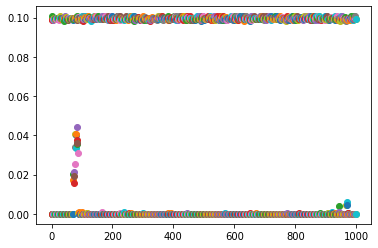

In [25]:
import numpy as np
import matplotlib.pyplot as plt
y = []
x = []
for i in range(0,1000):
    tup=(y_test[i],model[i])
    y.append(tup)
    x.append(i)
for xe, ye in zip(x, y):
    plt.scatter([xe] * len(ye), ye)

plt.savefig('t.png')

In [32]:
mse=0
for i in range(0,1000):
    mse+=(y_test[i]-model[i])*(y_test[i]-model[i])
mse=mse/1000
print(mse)

0.009813401117187948


In [33]:
import math
rmse=math.sqrt(mse)
print(rmse)

0.09906261210561706


In [34]:
mae=0
for i in range(0,1000):
    mae+=abs(y_test[i]-model[i])
mae=mae/3000
print(mae)

0.03299302681755276


In [35]:
e1=0
mean=0
for i in range(0,1000):
    e1+=(y_test[i]-model[i])*(y_test[i]-model[i])
    mean+=y_test[i]
mean=mean/1000
e2=0
for i in range(0,1000):
    e2+=(y_test[i]-mean)*(y_test[i]-mean)
print(1-e1/e2)

-597.9256033277793


In [45]:
for i in range(0,2000):
    df['sampled cpu usage'][8000+i]=model[i]

C:\Users\Sasi\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
df1=df[:10000]
print(df1.shape)

(10000, 20)


In [47]:
df1.to_csv('task_usage_predicted.csv')